In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
def threshold_image(img, THRESHOLD = 0.1):
    img = cv2.imread(img)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    
    # removes noise from images
    kernel = np.ones((3,3),np.uint8)
    opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
    # sure background area
    sure_bg = cv2.dilate(opening,kernel,iterations=3)
    dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
    ret, sure_fg = cv2.threshold(dist_transform,THRESHOLD*dist_transform.max(),255,0)
    
    # Finding unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg,sure_fg)
    
        # Marker labelling
    ret, markers = cv2.connectedComponents(sure_fg)

    # Add one to all labels so that sure background is not 0, but 1
    markers = markers+1

    # Now, mark the region of unknown with zero
    markers[unknown==255] = 0
    
    markers = cv2.watershed(img,markers)
    img[markers == -1] = [0,0,0]
    img[markers >= 2] = [0,255,0]
    
    return markers, img

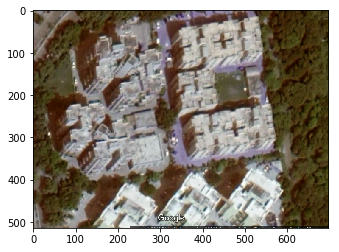

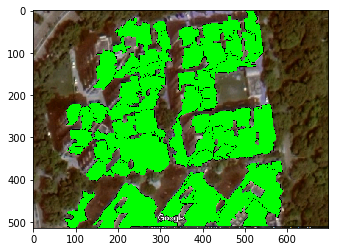

area available for harvesting:  35.42082436756492 meter square


In [18]:
IMAGE = 'image.png'
plt.imshow(cv2.imread(IMAGE))
plt.show()
img = cv2.imread(IMAGE)
markers, img = threshold_image(IMAGE, 0.3)   
plt.imshow(img)
plt.show()

cv2.imwrite('image_for_gif4.png',img)

img_width = img.shape[0]
img_height = img.shape[1]
area_covered_by_image = 100
num_pix = img_width*img_height
colored_pix = np.sum([markers>=2])
area = colored_pix/num_pix

print('area available for harvesting: ',area*area_covered_by_image, 'meter square')

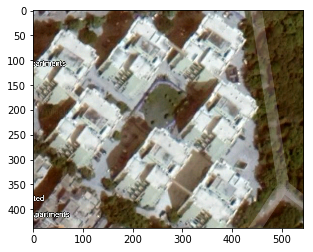

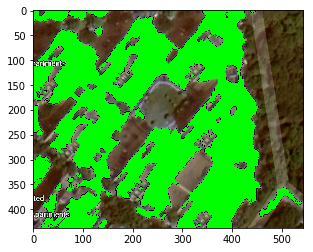

area available for harvesting:  45.14840182648402 meter square


In [5]:
IMAGE = 'img4.png'
plt.imshow(cv2.imread(IMAGE))
plt.show()
img = cv2.imread(IMAGE)
markers, img = threshold_image(IMAGE)   
plt.imshow(img)
plt.show()

img_width = img.shape[0]
img_height = img.shape[1]
area_covered_by_image = 100
num_pix = img_width*img_height
colored_pix = np.sum([markers>=2])
area = colored_pix/num_pix

print('area available for harvesting: ',area*area_covered_by_image, 'meter square')

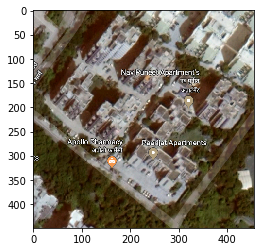

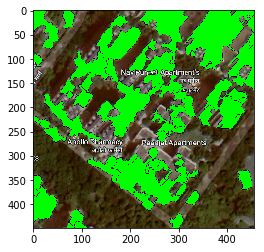

area available for harvesting:  32.02085219902592 meter square


In [39]:
IMAGE = 'img5.png'
plt.imshow(cv2.imread(IMAGE))
plt.show()
img = cv2.imread(IMAGE)
markers, img = threshold_image(IMAGE, 0.2)   
plt.imshow(img)
plt.show()

img_width = img.shape[0]
img_height = img.shape[1]
area_covered_by_image = 100
num_pix = img_width*img_height
colored_pix = np.sum([markers>=2])
area = colored_pix/num_pix

print('area available for harvesting: ',area*area_covered_by_image, 'meter square')

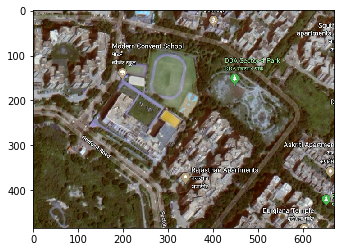

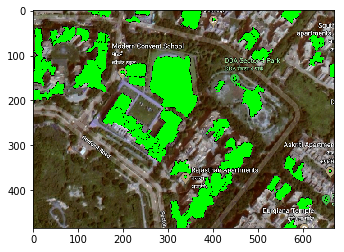

area available for harvesting:  16.07653879363513 meter square


In [40]:
IMAGE = 'img6.png'
plt.imshow(cv2.imread(IMAGE))
plt.show()
img = cv2.imread(IMAGE)
markers, img = threshold_image(IMAGE, 0.3)   
plt.imshow(img)
plt.show()

img_width = img.shape[0]
img_height = img.shape[1]
area_covered_by_image = 100
num_pix = img_width*img_height
colored_pix = np.sum([markers>=2])
area = colored_pix/num_pix

print('area available for harvesting: ',area*area_covered_by_image, 'meter square')

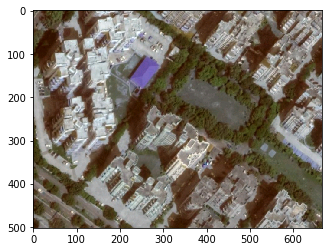

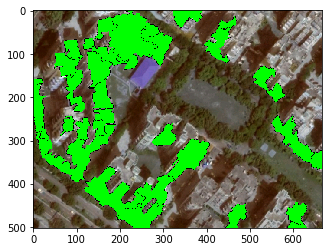

area available for harvesting:  21.244258348913192 meter square


In [41]:
IMAGE = 'img7.png'
plt.imshow(cv2.imread(IMAGE))
plt.show()
img = cv2.imread(IMAGE)
markers, img = threshold_image(IMAGE, 0.4)   
plt.imshow(img)
plt.show()

img_width = img.shape[0]
img_height = img.shape[1]
area_covered_by_image = 100
num_pix = img_width*img_height
colored_pix = np.sum([markers>=2])
area = colored_pix/num_pix

print('area available for harvesting: ',area*area_covered_by_image, 'meter square')